## Linear Regression

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. It is a statistical method used in data science and machine learning for predictive analysis

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#read data
data = pd.read_csv(r"C:\Users\dell\Downloads\Advertising.csv",index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Data Preprocessing

In [4]:
print(data.dtypes)
print(data.shape)
print(data.describe())
#to figure if there are outliers we check the std dev with the (max-75) - (25-min)
#from the data below we can tell there are outliers in newspaper data

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [5]:
#we wont be doing feature selection since all variables are important from the domain pov

In [6]:
#checking for missing values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

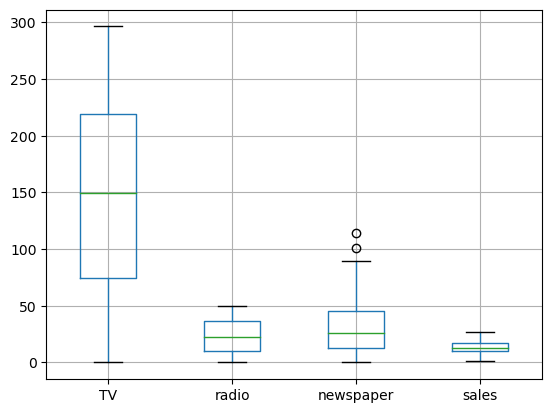

In [7]:
data.boxplot()

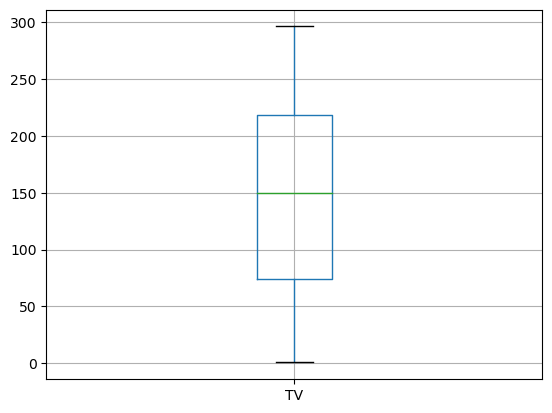

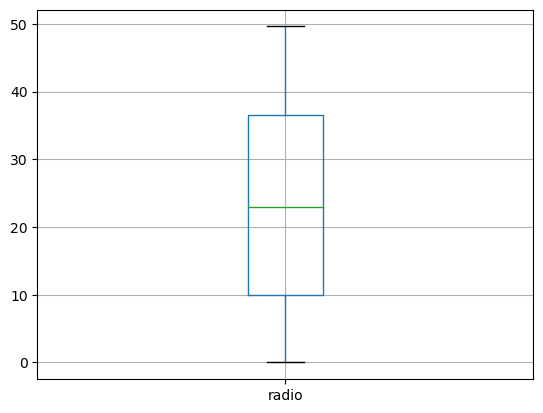

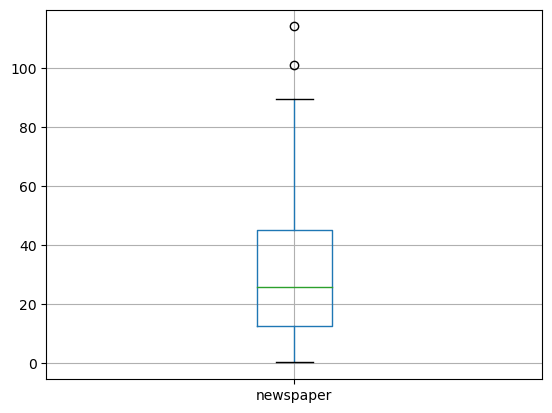

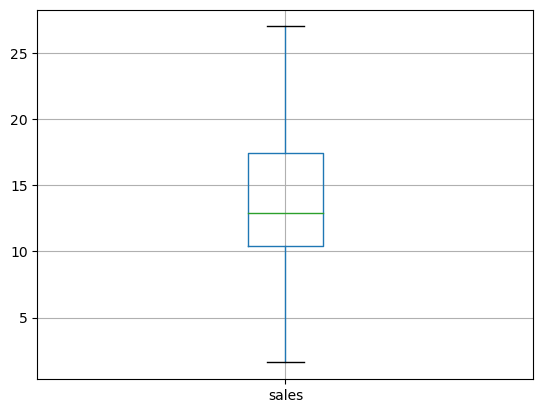

In [8]:
#Assumption 1 : There should be no outliers  in the data
#Check using boxplots
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

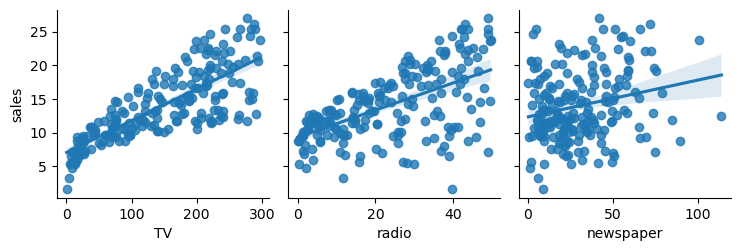

In [9]:
#We observe that newspaper has outliers which can be eliminated before we proceed
#ASSUMPTION 2:Assumption of linearity:Every independent variable should have a linear relationship with the dep var

sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars=["sales"],kind='reg')
plt.show()

In [ ]:
# we can observe that newspaper doesn't show a relationship with the sales variable.'So we can eliminate the newspaper 
#variable and
#proceed with tv and radio since they show a linear relationship with the sales variable.

#data.drop(data[data["newspaper"]>=90].index,axis=0,implace=True)

In [11]:
#data[data["newspaper"]>90].index

In [12]:
#create x and y
x = data.loc[:,['TV','radio','newspaper']]
y = data.loc[:,'sales']
#x=data.iloc[:,0:-1]
#y=data.iloc[:,-1]

In [13]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [14]:
import warnings
warnings.filterwarnings("ignore")

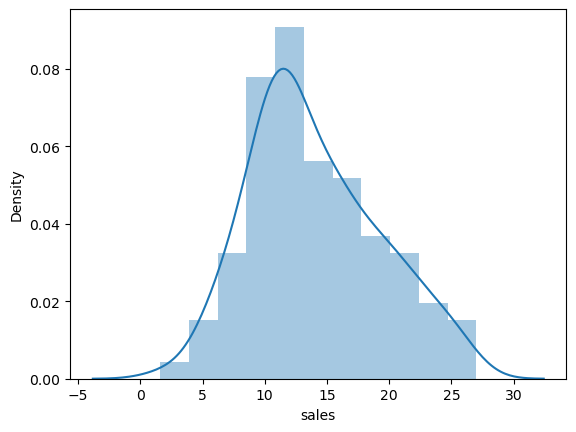

In [15]:
#Assumption of Normality: The dependent variable should follow an
#approximate normal distribution
sns.distplot(y)
plt.show()

In [16]:
#Incase y doesnt follow a normal distribution then we have to perform log transformations to reduce skewness in y
#and go ahead with the y log

#log transformation
#import numpy as np
#y_log = np.log(y)


#In this example we wont be using log transformation since the data
#is already normally distriuted and now if we do transformations it'll
#make the data skewed now

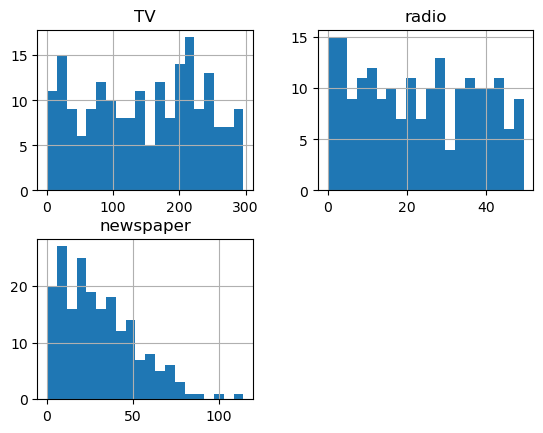

In [17]:

x.hist(bins=20)
plt.show()

In [18]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna())) #apply function will apply it to all the x variables
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])
# here it works like
#x['newspaper'] = np.log1p(x['newspaper'])

#we use log1p coz log of 0 is -infinty which will throw an error while building the model.In such cases we can
#use log plus 1 transformation to avoid the inf problem.

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


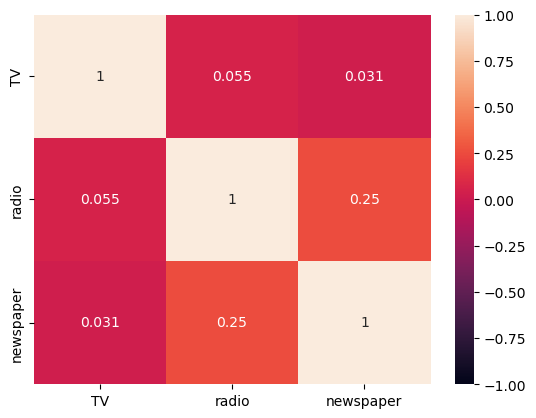

In [19]:
#Assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=x.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [21]:
#x.drop("newspaper",axis=1,inplace=True)
#return the VIF code 

In [22]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=10) 

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print("Percent of data",x_train.shape[0]/x.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)


In [24]:
#>1000--- test_size=0.3
#<1000--- test_size=0.2

In [25]:
from sklearn.linear_model import LinearRegression
#create model obj
lm= LinearRegression()
#train the model object
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3532913858151474
[ 0.0437425   0.19303708 -0.04895137]


In [26]:
#pair the feature names with the coefficients
print(list(zip(x.columns,lm.coef_)))

[('TV', 0.04374250157742166), ('radio', 0.1930370789734531), ('newspaper', -0.04895136822248787)]


In [27]:
x1=100
x2=200
x3=np.log1p(0)
y_pred=3.3532913858151474+(0.0437425*x1)+(0.19303708*x2)+(-0.04895137*x3)
print(y_pred)

46.334957385815144


In [28]:
#predict using the model
y_pred=lm.predict(x_test)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [29]:
new_df=pd.DataFrame()
new_df=x_test.copy()
 
new_df["Actual sales"]=y_test
new_df["Predicted sales"]=y_pred

In [30]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [31]:
new_df["Actual sales"]=y_test
new_df["Predicted sales"]=y_pred
new_df=new_df.reset_index().drop("index",axis=1)

In [32]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


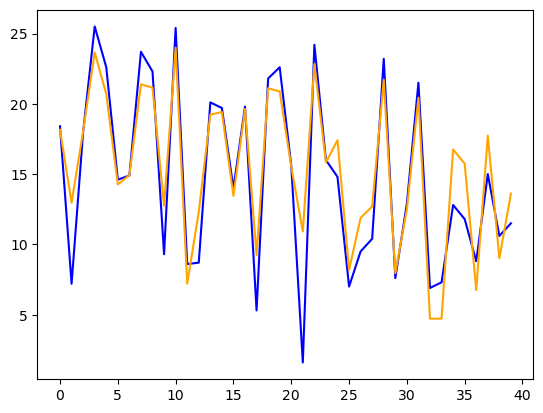

In [33]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()


In [34]:
lm.score(x_train, y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9208986647500219

## Evaluating the model

In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

#R squared is close to 1 so we can tell its a good model
# and RMSE is towards the lower end which means low error

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [36]:
print(y_test.min())
print(y_test.max())



1.6
25.5


In [37]:
#saving the model predictions in excel
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [38]:
 from sklearn.model_selection import train_test_split
 
#Split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=10) 

In [39]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(x_train,y_train)

#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [40]:
y_pred=rid.predict(x_test)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975934
RMSE: 2.592920462683998
Adj R-square: 0.832279819566434


In [43]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(x_train,y_train)

#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [44]:
y_pred=las.predict(x_test)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [48]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=1,l1_ratio=0.5)
en.fit(x_train,y_train)

#print intercept and coefficients
print(en.intercept_)
print(en.coef_)

3.286744514338503
[ 0.04367408  0.1895869  -0.        ]


In [49]:
y_pred=en.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8358845632451918
RMSE: 2.5844596348220477
Adj R-square: 0.8333725922744549


In [50]:
#OLS --> OLS(Y_train,X_train)
#ols --->ols(Y~X1+X2+X3)

In [51]:
#fit(X_train,Y_train) -->sklearn
#Y~X1+X2+X3,data=df -->statsmodels

In [53]:
new_df=pd.DataFrame()
new_df=x_train.copy()

new_df["sales"]=y_train.copy()
new_df.shape

(160, 4)

In [54]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())
 
"""
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]
 
"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           1.10e-85
Time:                        12:27:53   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3532913858151527\n[ 0.0437425   0.19303708 -0.04895137]\n \n'

In [55]:
  y_pred_new=lm_model.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


In [57]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Fri, 24 Nov 2023   Prob (F-statistic):           3.47e-87
Time:                        13:06:14   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [59]:
 y_pred_new=lm_model.predict(x_test)
    
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_new)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


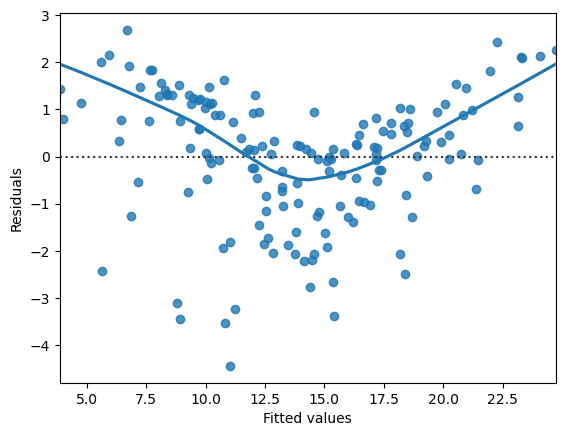

In [60]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

#We should get a random line generated IT SHOULDN'T SHOW A REPEATED OR WAVELIKE PATTERN
#

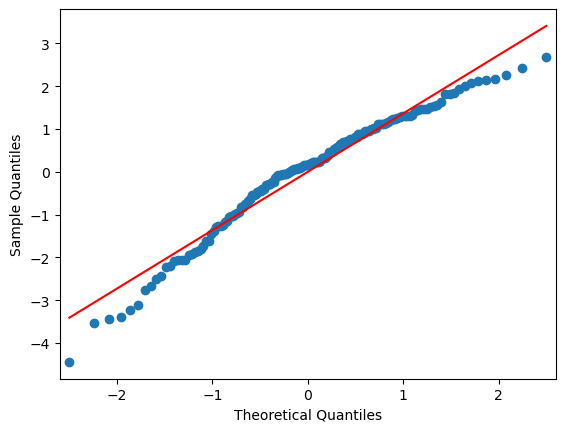

In [61]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
#qqplot is used to check for normality
#The normal qqplot is used to compare our data with standard normally distributed data(theoretically quantiles)
#If the datapoints follow the red diagonal line then it means that it follows normal distribution and if not then the data is skewed

#The errors should follow the red diagonal line

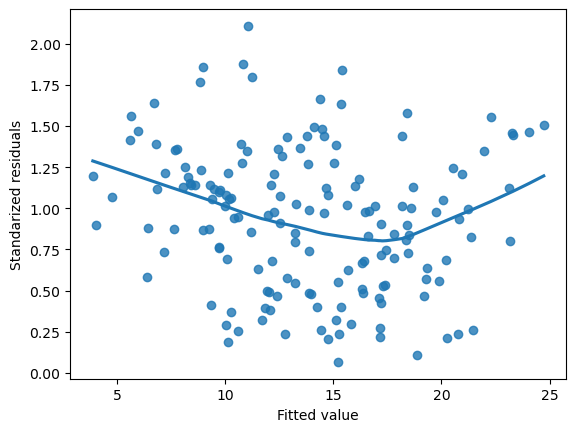

In [63]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

#we should end up getting an approximate horizontal line and not a v shaped line or a steep curve